# Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [2]:
 a = "C:/Users/sn408/Downloads/StockDataHDFCBANK.csv"
df = pd.read_csv(a)

# Displaying the first 5 rows of the dataset


In [3]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
0,0,2023-04-03T09:15:00+0530,1607.55,1609.55,1606.00,1606.65,169821
1,1,2023-04-03T09:20:00+0530,1606.55,1607.95,1603.40,1607.25,203608
2,2,2023-04-03T09:25:00+0530,1607.45,1607.65,1604.10,1607.00,164006
3,3,2023-04-03T09:30:00+0530,1607.00,1610.15,1606.70,1609.10,226137
4,4,2023-04-03T09:35:00+0530,1609.40,1610.40,1607.65,1608.25,138182


# Displaying the last 5 rows of the dataset

In [4]:
df.tail()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
1346,1346,2023-05-02T15:10:00+0530,1690.35,1692.70,1685.75,1685.75,547784
1347,1347,2023-05-02T15:15:00+0530,1686.05,1686.65,1682.55,1684.05,540934
1348,1348,2023-05-02T15:20:00+0530,1684.25,1687.50,1683.15,1683.80,324980
1349,1349,2023-05-02T15:25:00+0530,1683.80,1684.95,1682.05,1682.90,219808
1350,1350,2023-05-02T15:30:00+0530,1682.90,1682.90,1682.90,1682.90,0


# Checking for missing values

In [5]:
print(df.isnull().sum())

Unnamed: 0    0
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
dtype: int64


# Getting a summary of the dataset¶

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1351 entries, 0 to 1350
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1351 non-null   int64  
 1   Date        1351 non-null   object 
 2   Open        1351 non-null   float64
 3   High        1351 non-null   float64
 4   Low         1351 non-null   float64
 5   Close       1351 non-null   float64
 6   Volume      1351 non-null   int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 74.0+ KB
None


# Data Preprocessing

In [7]:
df['Date']=pd.to_datetime(df['Date'])
df.set_index(df['Date'],inplace=True)


# Displaying the updated dataset structure

In [8]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume
Date,,,,,,,
2023-04-03 09:15:00+05:30,0,2023-04-03 09:15:00+05:30,1607.55,1609.55,1606.00,1606.65,169821
2023-04-03 09:20:00+05:30,1,2023-04-03 09:20:00+05:30,1606.55,1607.95,1603.40,1607.25,203608
2023-04-03 09:25:00+05:30,2,2023-04-03 09:25:00+05:30,1607.45,1607.65,1604.10,1607.00,164006
2023-04-03 09:30:00+05:30,3,2023-04-03 09:30:00+05:30,1607.00,1610.15,1606.70,1609.10,226137
2023-04-03 09:35:00+05:30,4,2023-04-03 09:35:00+05:30,1609.40,1610.40,1607.65,1608.25,138182


# Data Visualization

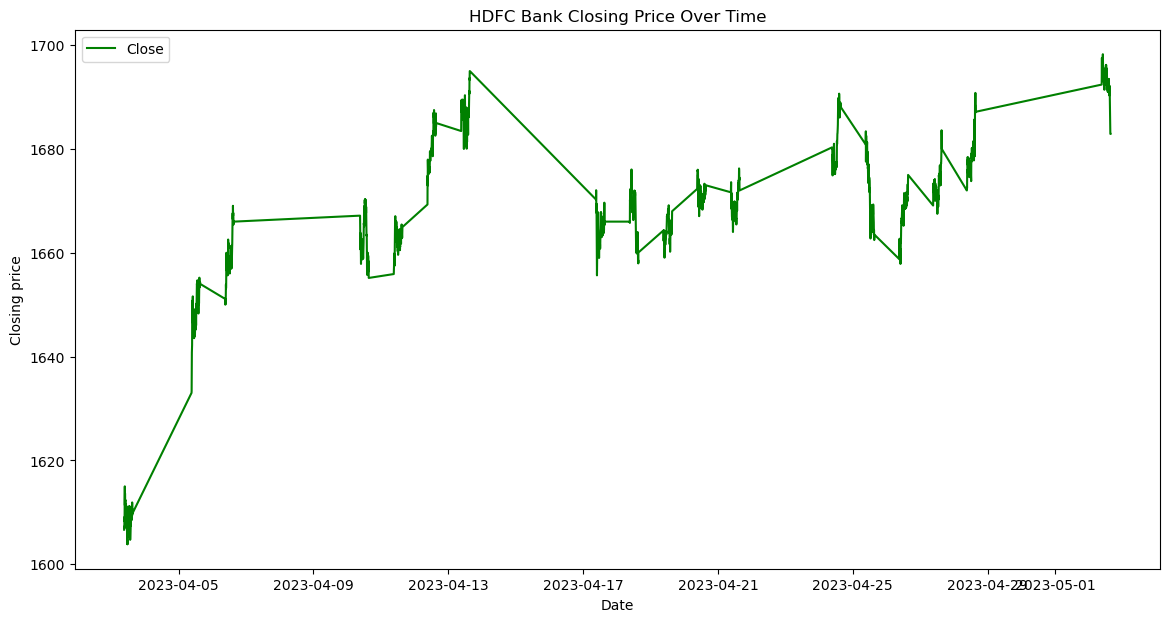

In [9]:
plt.figure(figsize=(14,7))
plt.plot(df.index,df['Close'],label='Close',color='green')
plt.title('HDFC Bank Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

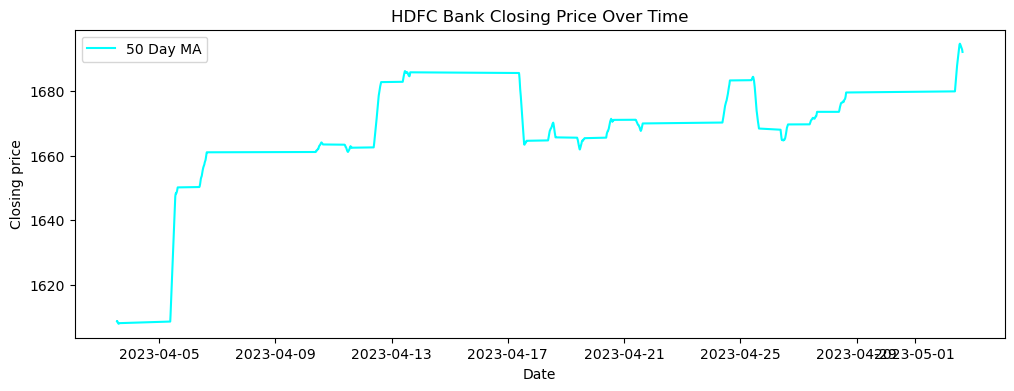

In [10]:
# Calculate the 50-Day and 200-day moving averages
df['50ma']=df['Close'].rolling(window=50).mean()
df['200ma']=df['Close'].rolling(window=200).mean()

#Plot 50 day moving Average

plt.figure(figsize=(12,4))
plt.plot(df.index,df['50ma'],label='50 Day MA',color='aqua')
plt.title('HDFC Bank Closing Price Over Time')
plt.xlabel("Date")
plt.ylabel('Closing price')
plt.legend()
plt.show()

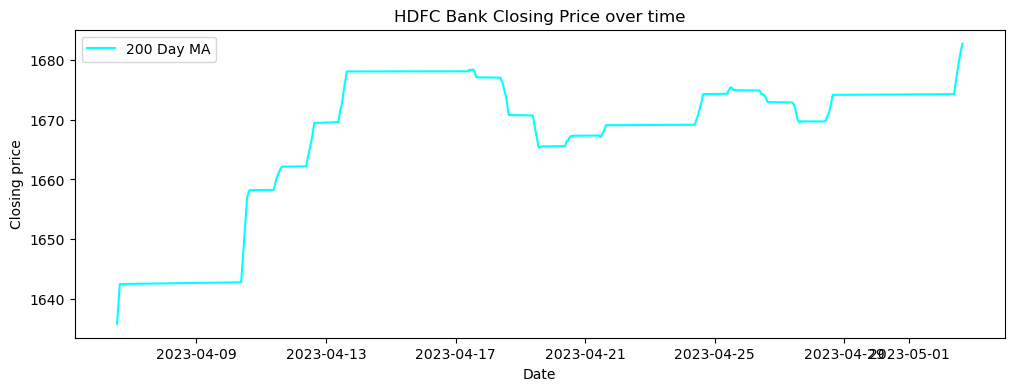

In [11]:
# plotting 200 Day moving Average
plt.figure(figsize=(12,4))
plt.plot(df.index,df['200ma'],label='200 Day MA',color ='aqua')
plt.title('HDFC Bank Closing Price over time')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

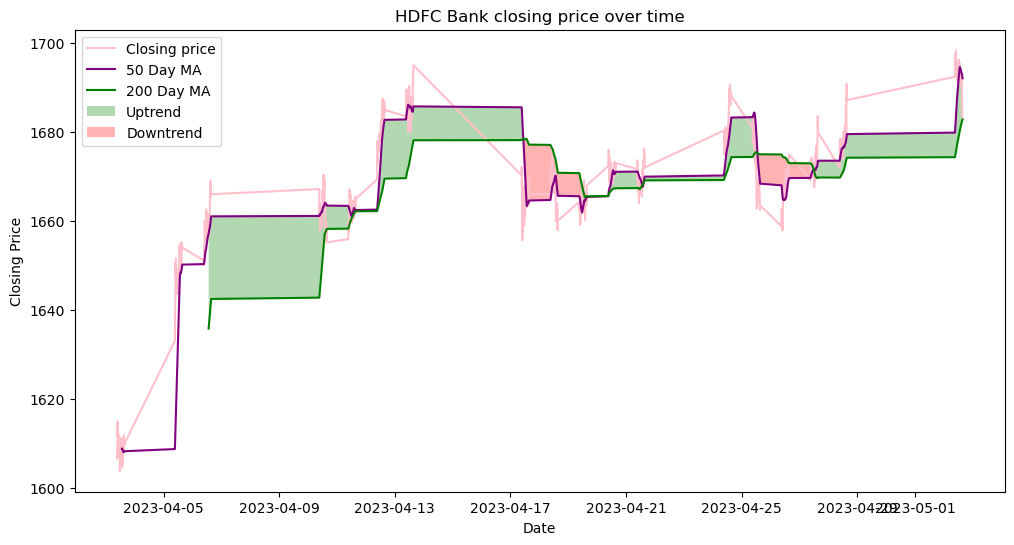

In [12]:
# plot Closing price with 50 day and 200 Day Moving Average

plt.figure(figsize=(12,6))
plt.plot(df.index,df['Close'],label='Closing price',color='pink')
plt.plot(df.index,df['50ma'],label='50 Day MA',color='purple')
plt.plot(df.index,df['200ma'],label='200 Day MA',color='green')

# Shading the upword trend (when 50ma > 200ma)
plt.fill_between(df.index,df['50ma'],df['200ma'],where=(df['50ma']>df['200ma']),facecolor='green',alpha=0.3,label='Uptrend')

# Shadding the Downward trend (when 50ma < 200ma)
plt.fill_between(df.index,df['50ma'],df['200ma'],where=(df['50ma']<df['200ma']),facecolor='red',alpha=0.3,label='Downtrend')

plt.title('HDFC Bank closing price over time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()